# Loading data

In [2]:
#loading package
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np              
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [19]:
df = pd.read_csv('London_imd_2019_cleaning.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ls11cd                                     4835 non-null   object 
 1   la11nm                                     4835 non-null   object 
 2   london_imd_rank                            4835 non-null   int64  
 3   london_imd_decile                          4835 non-null   int64  
 4   Index of Multiple Deprivation (IMD) Score  4835 non-null   float64
 5   Income Score (rate)                        4835 non-null   float64
 6   Employment Score (rate)                    4835 non-null   float64
 7   Education, Skills and Training Score       4835 non-null   float64
 8   Health Deprivation and Disability Score    4835 non-null   float64
 9   Crime Score                                4835 non-null   float64
 10  Barriers to Housing and 

,ls11cd,la11nm,london_imd_rank,london_imd_decile,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score
0,E01000001,City of London,4576,10,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,City of London,4700,10,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,City of London,2562,6,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,Barking and Dagenham,2485,6,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888


In [20]:
# rename
df.rename(columns = {'ls11cd':'code',
                     'la11nm':'name',
                     'Index of Multiple Deprivation (IMD) Score':'imd',
                     'Income Score (rate)':'income',
                     'Employment Score (rate)':'employment',
                     'Education, Skills and Training Score':'edu_ski_tra',
                     'Health Deprivation and Disability Score':'health_depri',
                     'Crime Score':'crime',
                     'Barriers to Housing and Services Score':'hous_serv',
                     'Living Environment Score':'living_env'}, 
          inplace = True)
df.head()

,code,name,london_imd_rank,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,E01000001,City of London,4576,10,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,City of London,4700,10,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,City of London,2562,6,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,Barking and Dagenham,2485,6,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888


# Clustering

In [5]:
mos = df
data=mos[["income","employment","edu_ski_tra","health_depri","crime","hous_serv","living_env"]]
print(data)

      income  employment  edu_ski_tra  health_depri  crime  hous_serv  \
0      0.007       0.010        0.024        -1.654 -2.012     29.472   
1      0.034       0.027        0.063        -1.115 -2.343     24.412   
2      0.086       0.086        5.804        -0.102 -1.032     40.103   
3      0.211       0.136       22.260        -0.121 -1.317     39.900   
4      0.117       0.059       14.798        -0.359 -0.147     45.171   
...      ...         ...          ...           ...    ...        ...   
4830   0.078       0.040        7.808        -0.394 -0.190     40.546   
4831   0.133       0.061        9.232        -0.196  0.214     50.293   
4832   0.184       0.119       17.868         0.879  0.365     37.315   
4833   0.154       0.095        9.758        -0.201 -0.276     45.060   
4834   0.145       0.085        6.379        -0.406  0.679     23.996   

      living_env  
0         31.873  
1         23.084  
2         40.535  
3         28.979  
4         26.888  
...      

In [6]:
# Standardisation
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data_standardised = data.copy()
for c in data.columns.values:
    data_standardised[c] = mms.fit_transform(data[c].values.reshape(-1,1))
data_standardised.head()

,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,0.002320,0.022293,0.000187,0.326228,0.072289,0.355050,0.306702
1,0.064965,0.076433,0.000848,0.438871,0.002325,0.275423,0.204685
2,0.185615,0.264331,0.098214,0.650575,0.279434,0.522346,0.407245
3,0.475638,0.423567,0.377304,0.646604,0.219193,0.519151,0.273110
4,0.257541,0.178344,0.250750,0.596865,0.466498,0.602099,0.248839


In [7]:
# K-means clustering and silhouette score
X = data_standardised[["income","employment","edu_ski_tra","health_depri","crime","hous_serv","living_env"]]
random_state_seed = 100
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4,5,6,7,8,9,10], 'silhouette_score':[0,0,0,0,0,0,0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
   
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.3564570594511862
For n_clusters = 3 The average silhouette_score is : 0.2496001412442607
For n_clusters = 4 The average silhouette_score is : 0.19178924727491767
For n_clusters = 5 The average silhouette_score is : 0.17933966466565673
For n_clusters = 6 The average silhouette_score is : 0.1782950637611331
For n_clusters = 7 The average silhouette_score is : 0.1672370708790995
For n_clusters = 8 The average silhouette_score is : 0.16332670459043389
For n_clusters = 9 The average silhouette_score is : 0.15859507590102145
For n_clusters = 10 The average silhouette_score is : 0.15612465777173593


In [8]:
X = data_standardised[["income","employment","edu_ski_tra","health_depri","crime","hous_serv","living_env"]]

x = []
y = []

# For resolutions of 'k' in the range 2..40
for k in range(2,41):
    
    #############
    # Do the clustering using the main columns
    kmeans = sklc.KMeans(n_clusters=k, n_init=25, random_state=42).fit(X)
    
    # Calculate the overall silhouette score
    silhouette_avg = sklm.silhouette_score(X, kmeans.labels_)
    
    y.append(k)
    x.append(silhouette_avg)
    
    print('.', end='')

....................................

KeyboardInterrupt: 

In [ ]:
print()
print(f"Largest silhouette score was {max(x):6.4f} for k={y[x.index(max(x))]}")

plt.plot(y, x)
plt.gca().xaxis.grid(True);
plt.gcf().suptitle("Average Silhouette Scores");

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
scores=[]#silhoutte Score
intra_sum_of_square_list = [] #elbow

max_cluster = 20
clusters = range(2,max_cluster)

for k in clusters:
    km = KMeans(n_clusters=k)
    labels=km.fit(X).labels_
    score=metrics.silhouette_score(X,labels)
    scores.append(score) #silhoutte Score
    intra_sum_of_square_list.append(km.inertia_) #elbow

In [ ]:
#Elbow
from matplotlib.pyplot import MultipleLocator
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Intra sum of distances(WCSS)")
plt.plot(clusters,intra_sum_of_square_list,marker = 'o', linestyle = '--')


x_major_locator = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

In [ ]:
# combine two indicators together!
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()

Elbow, =ax1.plot(clusters,intra_sum_of_square_list, label="Elbow", marker = 'o', linestyle = '--')
Sihoutte_score, =ax2.plot(clusters, scores,label="Sihoutte_score", color='red', marker = '*', linestyle = '--')

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Intra sum of distances(WCSS)")
ax2.set_ylabel('silhoutte Score')

x_major_locator = MultipleLocator(2)
ax1 = plt.gca()
ax1.xaxis.set_major_locator(x_major_locator)


#legend
legend = ax1.legend(handles=[Elbow,Sihoutte_score], loc='upper right')

In [22]:
# 3 clusters
num_clusters = 3
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(data_standardised)

print(kmeans_output) 

clustering_ids_kmeans = kmeans_output.labels_

print(clustering_ids_kmeans)

# combine the clustering IDs to the dataframe
data3 = df.assign(cluster_id = clustering_ids_kmeans)

#Have a look at the result:
print(data3)

KMeans(n_clusters=3, random_state=100)
[2 2 0 ... 1 0 0]
           code                  name  london_imd_rank  london_imd_decile  \
0     E01000001        City of London             4576                 10   
1     E01000002        City of London             4700                 10   
2     E01000003        City of London             2562                  6   
3     E01000005        City of London             1325                  3   
4     E01000006  Barking and Dagenham             2485                  6   
...         ...                   ...              ...                ...   
4830  E01033742             Greenwich             3538                  8   
4831  E01033743             Greenwich             2347                  5   
4832  E01033744             Greenwich             1235                  3   
4833  E01033745             Greenwich             2184                  5   
4834  E01033746             Greenwich             2227                  5   

         imd  inco

# Map Clusters

In [23]:
df2 = data3

In [24]:
df2.head(1)

,code,name,london_imd_rank,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id
0,E01000001,City of London,4576,10,6.208,0.007,0.01,0.024,-1.654,-2.012,29.472,31.873,2


In [36]:
import geopandas as gpd
lsoa = gpd.read_file('./shp/LSOA_2011_London_gen_MHW.shp')

In [37]:
lsoa.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [38]:
joined = lsoa.merge(df2,left_on = 'LSOA11CD', right_on ='code')
joined.head(1)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,10,6.208,0.007,0.01,0.024,-1.654,-2.012,29.472,31.873,2


In [39]:
joined.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,10,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,2
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,10,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,2
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,6,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,1
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,6,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0


In [40]:
# find the code for city of london in 2011
c1= ward[ward['geo_code'] =='E36007054']
c2= ward[ward['geo_code'] =='E05000001']
c3= ward[ward['geo_code'] =='E05000015']
c4=ward[ward['geo_code'] =='E36007052']
city_of_london = c1.append(c2).append(c3).append(c4)

/tmp/ipykernel_2243/1079485722.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_of_london = c1.append(c2).append(c3).append(c4)
/tmp/ipykernel_2243/1079485722.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_of_london = c1.append(c2).append(c3).append(c4)
/tmp/ipykernel_2243/1079485722.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_of_london = c1.append(c2).append(c3).append(c4)


In [41]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

AttributeError: 'NoneType' object has no attribute 'set_title'

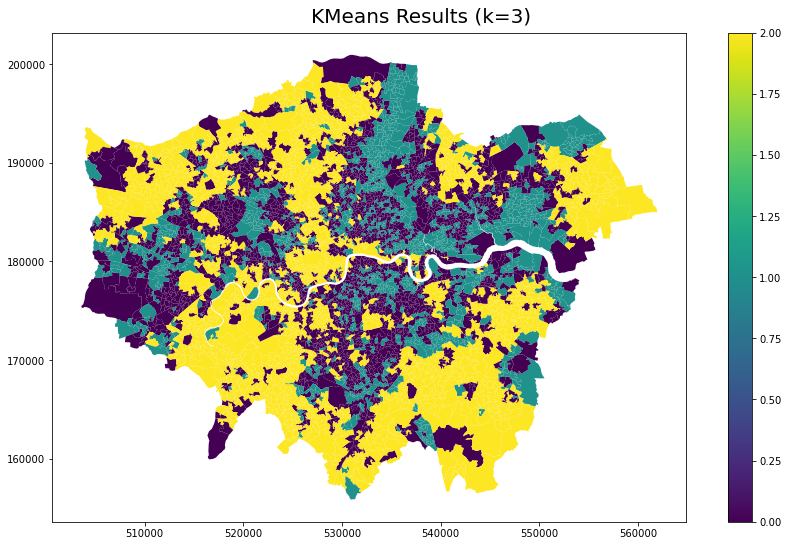

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
fig.suptitle(f"KMeans Results (k=3)", fontsize=20, y=0.92)
joined.plot(ax=ax, column='cluster_id',legend=True)


ax.get_legend().set_title("clusters")  #set the legend title


city_of_london.plot(ax=ax,color='#17becf')
ax.axis('off') #don't plot the axes (bounding box)
#plt.savefig('cluster_map.png')

In [44]:
df3=df2[['income', 'employment', 'edu_ski_tra', 'health_depri', 'crime', 'hous_serv', 'living_env', 'cluster_id']]

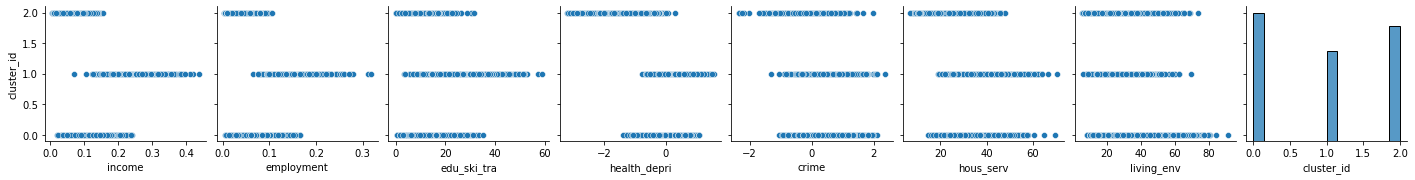

In [47]:
import seaborn as sns
sns.pairplot(df3, y_vars='cluster_id')